<a href="https://colab.research.google.com/github/revanth8607/Capstone/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries and dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, f1_score, log_loss
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_fscore_support 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

matplotlib inline

In [3]:
df = pd.read_csv('kidney_disease.csv')
print("="*90)
print("="*90)
print("\n\t\t\t\tData Before Pre-processing \n")  #Data before preprocessing
print(df)


				Data Before Pre-processing 

      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes 

Data encoding part

In [4]:
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'class'},inplace=True)

Further cleaning

In [5]:
df['pe'] = df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
df.drop('id',axis=1,inplace=True)
df = df.replace("?", np.nan)
df = df.replace("   ?", np.nan)
df = df.fillna(method='ffill')
df = df.fillna(method='backfill')
print("="*90)
print("="*90)
print("\n\t\t\t\tData After Pre-processing \n")   #Data before preprocessing
print(df)


				Data After Pre-processing 

      age    bp     sg   al   su  rbc   pc  pcc   ba    bgr  ...  pcv    wc  \
0    48.0  80.0  1.020  1.0  0.0  0.0  0.0  0.0  0.0  121.0  ...   44  7800   
1     7.0  50.0  1.020  4.0  0.0  0.0  0.0  0.0  0.0  121.0  ...   38  6000   
2    62.0  80.0  1.010  2.0  3.0  0.0  0.0  0.0  0.0  423.0  ...   31  7500   
3    48.0  70.0  1.005  4.0  0.0  0.0  1.0  1.0  0.0  117.0  ...   32  6700   
4    51.0  80.0  1.010  2.0  0.0  0.0  0.0  0.0  0.0  106.0  ...   35  7300   
..    ...   ...    ...  ...  ...  ...  ...  ...  ...    ...  ...  ...   ...   
395  55.0  80.0  1.020  0.0  0.0  0.0  0.0  0.0  0.0  140.0  ...   47  6700   
396  42.0  70.0  1.025  0.0  0.0  0.0  0.0  0.0  0.0   75.0  ...   54  7800   
397  12.0  80.0  1.020  0.0  0.0  0.0  0.0  0.0  0.0  100.0  ...   49  6600   
398  17.0  60.0  1.025  0.0  0.0  0.0  0.0  0.0  0.0  114.0  ...   51  7200   
399  58.0  80.0  1.025  0.0  0.0  0.0  0.0  0.0  0.0  131.0  ...   53  6800   

      rc  htn   dm

Correlation part

In [6]:
df = df.dropna(axis=0)
df['class'].value_counts()
corr_df = df.corr()

Generate a mask for the upper triangle

In [7]:
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

<ipython-input-7-a2dee1de347c>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_df, dtype=np.bool)


Set up the matplotlib figure

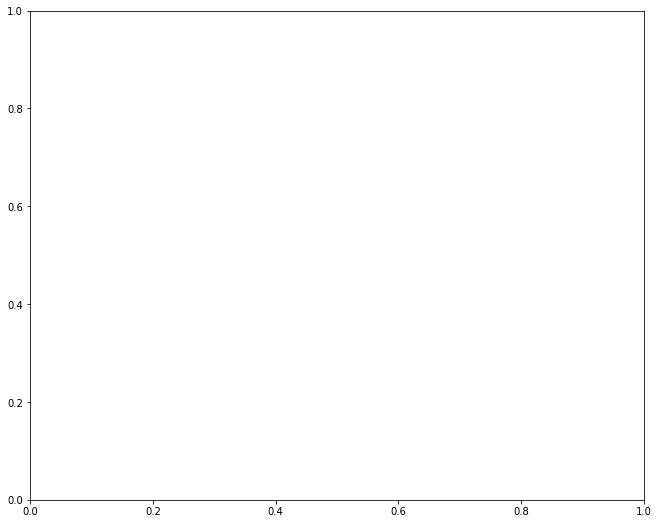

In [8]:
f, ax = plt.subplots(figsize=(11, 9))

Generate a custom diverging colormap

In [9]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

Draw the heatmap with the mask and correct aspect ratio


	Correlations between different attributes


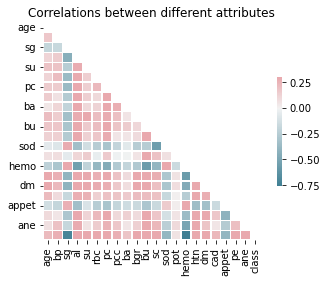

In [10]:
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
print("="*90)
print("="*90)
print("\n\tCorrelations between different attributes")
plt.title('Correlations between different attributes')
plt.show()

Division of dataset

In [11]:
X = df.drop("class", axis=1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Data for ML training

In [12]:
print("="*90)
print("="*90)
print("\n\t\t\t\t\tX_train\n")
print(X_train)


					X_train

      age     bp     sg   al   su  rbc   pc  pcc   ba    bgr  ...  hemo  pcv  \
157  62.0   70.0  1.025  3.0  0.0  0.0  1.0  0.0  0.0  122.0  ...  12.6   39   
109  54.0   70.0  1.015  0.0  0.0  0.0  1.0  0.0  0.0  233.0  ...  11.7   37   
17   47.0   80.0  1.015  2.0  0.0  0.0  0.0  0.0  0.0  114.0  ...  12.1   24   
347  43.0   60.0  1.025  0.0  0.0  0.0  0.0  0.0  0.0  108.0  ...  17.8   43   
24   42.0  100.0  1.015  4.0  0.0  0.0  1.0  0.0  1.0   95.0  ...  11.1   39   
..    ...    ...    ...  ...  ...  ...  ...  ...  ...    ...  ...   ...  ...   
71   46.0   60.0  1.010  1.0  0.0  0.0  0.0  0.0  0.0  163.0  ...   9.8   28   
106  50.0   90.0  1.015  0.0  0.0  0.0  0.0  0.0  0.0   89.0  ...   6.0   17   
270  23.0   80.0  1.025  0.0  0.0  0.0  0.0  0.0  0.0  111.0  ...  14.3   41   
348  38.0   80.0  1.020  0.0  0.0  0.0  0.0  0.0  0.0   99.0  ...  13.6   44   
102  17.0   60.0  1.010  0.0  0.0  1.0  0.0  0.0  0.0   92.0  ...  13.9   52   

        wc   rc  htn   d

Data for ML testing

In [13]:
print("="*90)
print("="*90)
print("\n\t\t\t\t\tX_test\n")
print(X_test)


					X_test

      age     bp     sg   al   su  rbc   pc  pcc   ba    bgr  ...  hemo  pcv  \
209  19.0   70.0  1.020  0.0  0.0  0.0  0.0  0.0  0.0  341.0  ...  11.5   41   
280  47.0   80.0  1.025  0.0  0.0  0.0  0.0  0.0  0.0   93.0  ...  13.3   52   
33   60.0  100.0  1.020  2.0  0.0  1.0  1.0  0.0  0.0  140.0  ...  10.1   29   
210  59.0  100.0  1.015  4.0  2.0  0.0  0.0  0.0  0.0  255.0  ...   7.3   20   
93   73.0  100.0  1.010  3.0  2.0  1.0  1.0  1.0  0.0  295.0  ...   9.2   30   
..    ...    ...    ...  ...  ...  ...  ...  ...  ...    ...  ...   ...  ...   
60   67.0   90.0  1.020  1.0  0.0  1.0  1.0  1.0  0.0  141.0  ...   6.6   33   
79   56.0   80.0  1.010  1.0  0.0  1.0  0.0  0.0  0.0  165.0  ...  13.5   40   
285  66.0   70.0  1.020  0.0  0.0  0.0  0.0  0.0  0.0   94.0  ...  16.0   41   
305  41.0   80.0  1.020  0.0  0.0  0.0  0.0  0.0  0.0  122.0  ...  17.1   41   
281  55.0   80.0  1.025  0.0  0.0  0.0  0.0  0.0  0.0  130.0  ...  15.5   41   

        wc   rc  htn   dm

Applying Machine Learning Techniques

In [15]:
print("="*90)
print("="*90)
print("\nResults")
classifiers = [
    KNeighborsClassifier(5),
    SVC(C=.1, degree=1, kernel='poly', probability=True),
    NuSVC(nu=.1, degree=1, kernel='poly', probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    LogisticRegression()]

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf._class.name_

    print("\n")
    print("="*90)
    print("="*90)
    print("\nMachine Learning model: ",name)
    try:
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        #Accuracy
        print("Accuracy: \n {:.3%}".format(acc))
        #Precision
        print("precision_score: \n",precision_score(y_test, train_predictions))
        #Confusion Matrix
        print("confusion_matrix: \n",confusion_matrix(y_test, train_predictions))
    except Exception as e:
        print (e)


Results


ValueError: ignored

Testing the data

In [16]:
df1 = pd.read_csv('try.csv')
df1[['htn','dm','cad','pe','ane']] = df1[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df1[['rbc','pc']] = df1[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df1[['pcc','ba']] = df1[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df1[['appet']] = df1[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})

FileNotFoundError: ignored

Data for ML prediction

In [17]:
X_try = df1.drop('id',axis=1)

NameError: ignored

Choosing the ML model

In [18]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_try)

ValueError: ignored

Printing the output

In [19]:
print("\n")
print("="*90)
print("="*90)
print("\nPrediction from excel dataset:\n")
print("0->not ckd, 1->ckd\n")
print(y_pred,"\n")
print("="*90)
print("="*90)




Prediction from excel dataset:

0->not ckd, 1->ckd



NameError: ignored